# ECS 170 Homework 2 Mel Avina-Beltran
Goal: Create a classification model using Tensorflow and Keras that identifies the different categories of the fashion dataset Fashion MNIST.

We need to create a Convolutional Neural Network (CNN) that identifies and trains the images on the dataset. CNN's are the first algorithm choice when classifying images, while Tensorflow and Keras is utilized for data manipulation.

## Part 1: Analyzing the data
1. Import libraries
We start by importing the necessary libraries.
MATPLOTLIB shows images, NUMPY manipulates arrays, TENSORFLOW + KERAS is for deep learning and machine learning, and SKLEARN is for machine learning algorithms.

In [1]:
# loads mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# imports confusion matrix visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# imports types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

2. Load data and split it into training and testing

The Fashion MNIST dataset is made up of 70,000 images with 60,000 being used for training and the other 10,000 images being used for testing. It consists of 10 of the following categories: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag and Ankle boot. Each image is 28x28 pixels, with the dataset being split for training and testing.

In [2]:
# splits data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# prints dimensions of dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

# 10 output labels for Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover',
          'dress', 'coat', 'sandal', 'shirt',
          'sneaker', 'bag', 'ankle_boots']

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


3. Visualize data

Now we can create a plot to vizualize the categories in the dataset using MATPLOTLIB.

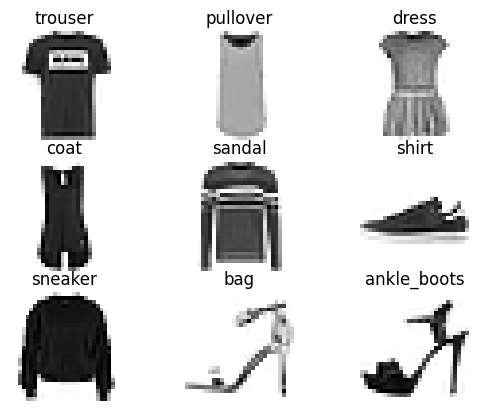

In [3]:
for i in range(1, 10):

    # vreates 3x3 grid and places image in ith position of grid
    plt.subplot(3, 3, i)

    # inserts ith image with the color map 'grap'
    plt.axis(False)
    plt.imshow(trainX[i], cmap=plt.get_cmap('binary'),)
    plt.title(labels[i])

# shows entire plot
plt.show()

# Part 2: Training the model
1. Create the CNN architecture

Next we want to build a CNN from scratch to classify the images in the dataset. We will use 2 convolutionals layers, 2 max pooling layers and 2 fully connected layers. The last layer, the softmax layer, consists of 10 nodes because we have 10 categories to be labeled.

In [4]:
def model_arch():
    models = Sequential()

    # learning 56 filters with kernal size of 3x3
    models.add(Conv2D(28, (3, 3),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))

    # max pooling reduces size with kernal size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(112, (3, 3), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(224, (3, 3), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))

    # when convolutional and pooling operations are done layers is flattened and fully connected layers are added
    models.add(Flatten())
    models.add(Dense(224, activation="relu"))

    # with total 10 classes to add a FCC layer of 10 is created with softmax activation function
    models.add(Dense(10, activation="softmax"))
    return models

2. Compile the model

We can show the model summary by compiling the model and setting out the loss to sparse categorical crossentropy and metrics to sparse categorical accuracy.

In [5]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 112)       28336     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 112)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 224)         226016    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 224)        0

3. Train the data on the model

After we train the model using the mode.fit() function and setting the epochs to 10.

In [6]:
history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 116s 1s/step - loss: 2.7827 - sparse_categorical_accuracy: 0.6991 - val_loss: 0.3951 - val_sparse_categorical_accuracy: 0.8556
Epoch 2/10
100/100 [==============================] - 98s 983ms/step - loss: 0.3465 - sparse_categorical_accuracy: 0.8755 - val_loss: 0.3323 - val_sparse_categorical_accuracy: 0.8799
Epoch 3/10
100/100 [==============================] - 97s 976ms/step - loss: 0.2891 - sparse_categorical_accuracy: 0.8957 - val_loss: 0.2980 - val_sparse_categorical_accuracy: 0.8930
Epoch 4/10
100/100 [==============================] - 97s 969ms/step - loss: 0.2436 - sparse_categorical_accuracy: 0.9123 - val_loss: 0.2798 - val_sparse_categorical_accuracy: 0.9008
Epoch 5/10
100/100 [==============================] - 107s 1s/step - loss: 0.2223 - sparse_categorical_accuracy: 0.9183 - val_loss: 0.2865 - val_sparse_categorical_accuracy: 0.8974
Epoch 6/10
100/100 [==============================] - 96s 966ms/step - loss: 0.1940 - spa

4. Save the model

In [7]:
model.save_weights('./model.h5', overwrite=True)

5. Plot the training and loss functions

We want to plot the training and loss functions because it tells us how well the model performed under the number of epochs and how much time it took for the model to converge.

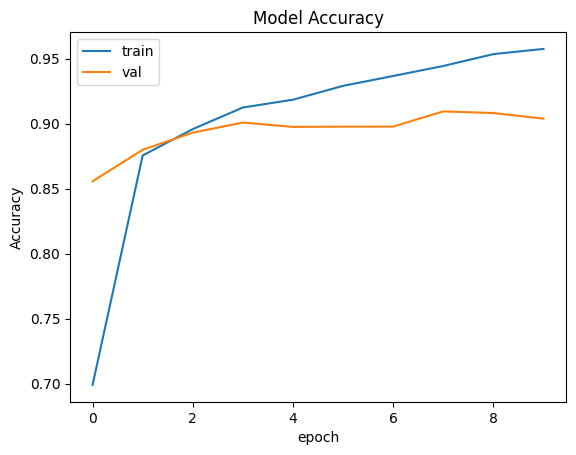

In [8]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

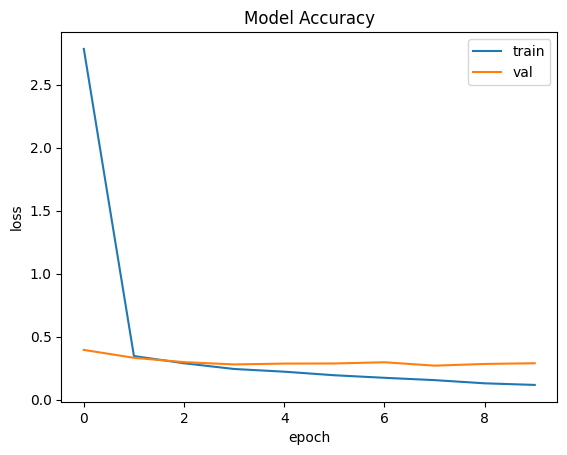

In [9]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

6. Plot the Train and Validation Results

The plot displays lines representing the training and validation metrics (ie. loss and accuracy) over the training epochs. This visualization helps us analyze how well the model is performing during training, check for overfitting or underfitting, and make informed decisions about model tuning.

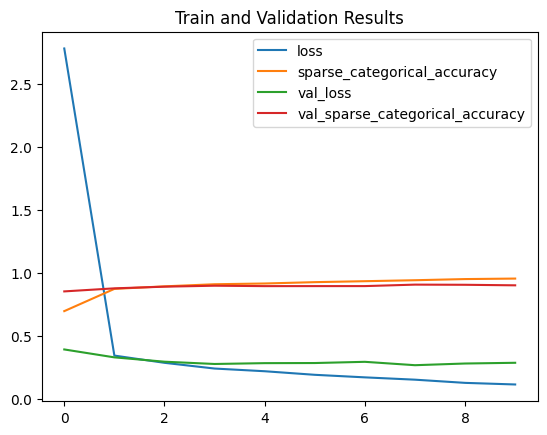

In [10]:
pd.DataFrame(history.history).plot(title="Train and Validation Results");


# Part 3: Prediction

1. Evaluating model on test data

The output of this code displays the test accuracy as a percentage, indicating how well the trained model performs on unseen data. (Ie. If it prints "Test accuracy: 94.5%", it means that the model correctly predicted 94.5% of the labels in the test dataset.)

In [11]:
loss, accuracy = model.evaluate(testX, testy)
print('Test accuracy:' , accuracy * 100,'%')

313/313 [==============================] - 6s 20ms/step - loss: 0.3155 - sparse_categorical_accuracy: 0.8998
Test accuracy: 89.98000025749207 %


2. Create Confusion Matrix

The y_preds array contains the integer class labels predicted by the model for each sample in the test dataset. These labels represent the model's predictions for the class of each input sample.

Then we calculate the confusion matrix, create a plot of the confusion matrix with labeled axes and class labels, and set a title to help evaluate the model's performance in classifying different categories. The confusion matrix helps us understand how well a classification model is performing across various classes. The clothing items with the lowest values show between the range of 600 - 1000 illustrate where the model gets confused. Similar looking items confused the model.

In [12]:
#Make predictions
y_probs = model.predict(testX)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

313/313 [==============================] - 7s 21ms/step


Text(0.5, 1.0, 'Confusion Matrix')

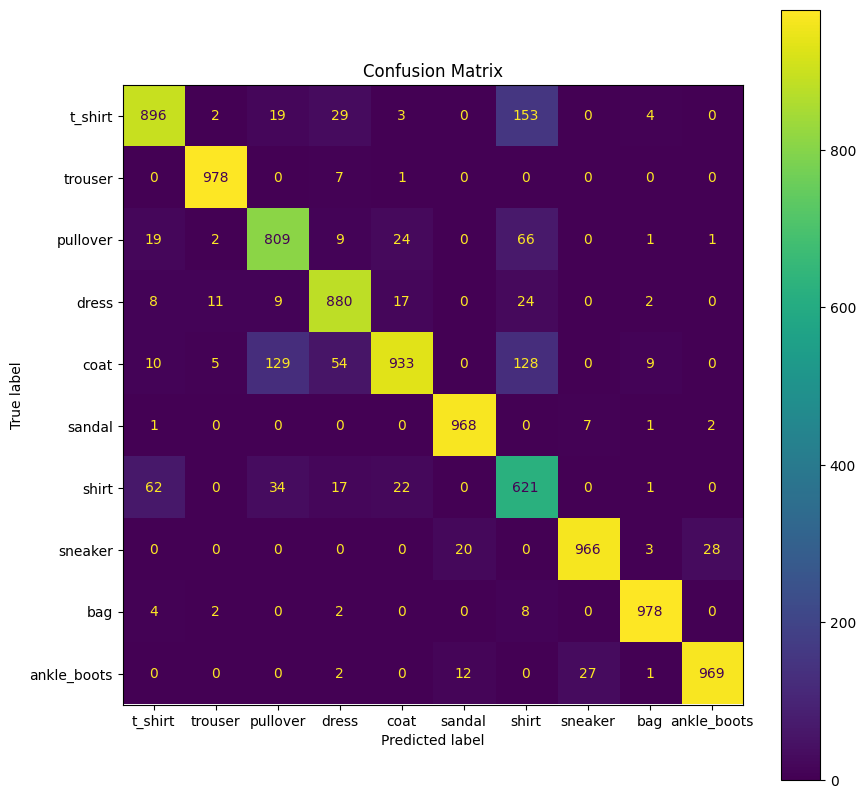

In [13]:
# confusion matrix
cm = confusion_matrix(y_preds,testy)

# plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);
plt.title("Confusion Matrix")

3. Visualizing Random Predictions

This function visualizes random predictions made by a machine learning model. It displays a set of images along with their predicted labels and true labels in a grid format. It is useful for visually inspecting how well the model is performing on a variety of test images.

When we call plot_random_image(model, testX, testy, labels), the function generates a visualization showing random predictions made by the model on a subset of test images (testX). Each subplot in the visualization will display an image, the model's predicted label, and the true label. The colors of the labels will indicate whether the prediction is correct (green) or incorrect (red). This helps us assess how well the model performs on a selection of test images and visually inspect its predictions.

In [14]:
import random

def plot_random_image(model,images, true_labels, classes):

    plt.figure(figsize=(15,5))

    for i in range(12):
        ax=plt.subplot(2,6,i+1)
        rand_index=random.choice(range(len(images)))

        # Make prediction
        target_image=images[rand_index]
        pred_probs=model.predict(tf.expand_dims(target_image,axis=0))
        pred_label=classes[pred_probs.argmax()]
        true_label= classes[true_labels[rand_index]]
        plt.imshow(target_image,cmap=plt.cm.binary)

        # Change the color of the titles
        if pred_label==true_label:
            color="green"
        else:
            color="red"

        plt.xlabel("Pred:{} {:2.0f}% \n(True:{})".format(pred_label,
                                             100*tf.reduce_max(pred_probs),
                                             true_label),
                                             color=color, fontsize=10
                                             )
        # Hide ticks
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)

1/1 [==============================] - 0s 17ms/step


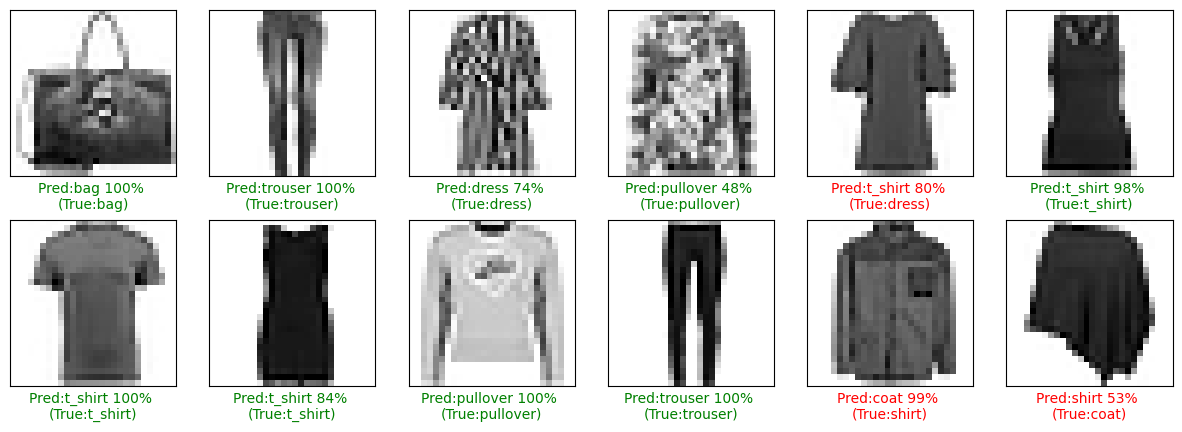

In [15]:
# Run to make random predictions
plot_random_image(model,testX,testy,labels)

# Part 4: Conclusion

The project demonstrates the creation and training of a CNN model for the Fashion MNIST dataset. It involves data normalization, model architecture design, training, evaluation, and visualization of results. The project also highlights areas where the model tends to get confused, particularly between similar classes like shirts and t-shirts or coats and pullovers. Overall, this project serves as a practical example of image classification using deep learning techniques.




